In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Loading Data

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
iris  = load_iris()
X = iris.data
y = iris.target

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


# Preprocessing Data

In [ ]:
features = iris.feature_names
X = df[features].values
y = df['target'].values
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

# Spliting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nBefore scaling - Feature ranges:")
for i in range(X.shape[1]):
    print(f"Feature {i}: Min={np.min(X[:, i])}, Max={np.max(X[:, i])}")

print(f"\nAfter scaling - Feature ranges:")
for i in range(X_train.shape[1]):
    print(f"Feature {i}: Min={np.min(X_train[:, i])}, Max={np.max(X_train[:, i])}")


Before scaling - Feature ranges:
Feature 0: Min=4.3, Max=7.9
Feature 1: Min=2.0, Max=4.4
Feature 2: Min=1.0, Max=6.9
Feature 3: Min=0.1, Max=2.5

After scaling - Feature ranges:
Feature 0: Min=-1.8409828571755729, Max=2.457960895796573
Feature 1: Min=-2.3470966229071224, Max=3.0262247395511506
Feature 2: Min=-1.5160669048374, Max=1.7772619521127588
Feature 3: Min=-1.4549447941872742, Max=1.705116297260203


# One hot encoding

In [ ]:
y_train_cat = to_categorical(y_train,3)
y_test_cat = to_categorical(y_test,3)

print(f"\nOne-hot encoded labels shape: {y_train_cat.shape}")
print(f"Sample label before encoded: ({y_train[0]} ({iris.target_names[y_train[0]]}))")
print(f"Sample label after encoded: {y_train_cat[0]}")


One-hot encoded labels shape: (120, 3)
Sample label before encoded: (0 (setosa))
Sample label after encoded: [1. 0. 0.]


In [ ]:
y_train_cat

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

# Neural Network model building

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(4,), name='input_layer'),
    layers.Dense(64, activation='relu', name = 'hidden_layer_1'),
    layers.Dropout(0.3,name='dropout_1'),
    layers.Dense(32, activation='relu', name = 'hidden_layer_2'),
    layers.Dropout(0.3,name='dropout_2'),
    layers.Dense(16, activation='relu', name = 'hidden_layer_3'),
    layers.Dense(3, activation='softmax', name = 'output_layer')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.3711 - loss: 1.0519 - val_accuracy: 0.3750 - val_loss: 1.0055 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5007 - loss: 0.9941 - val_accuracy: 0.5417 - val_loss: 0.9470 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4946 - loss: 0.9601 - val_accuracy: 0.5833 - val_loss: 0.8953 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6195 - loss: 0.8936 - val_accuracy: 0.5833 - val_loss: 0.8498 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6680 - loss: 0.8310 - val_accuracy: 0.5833 - val_loss: 0.8076 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6879 - loss: 0.7995 - val_accuracy: 0.5833 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7071 - loss: 0.7234 - val_accuracy: 0.5833 

# Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9000 - loss: 0.2024
Test accuracy: 0.9000
Test loss: 0.2024


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Visualization

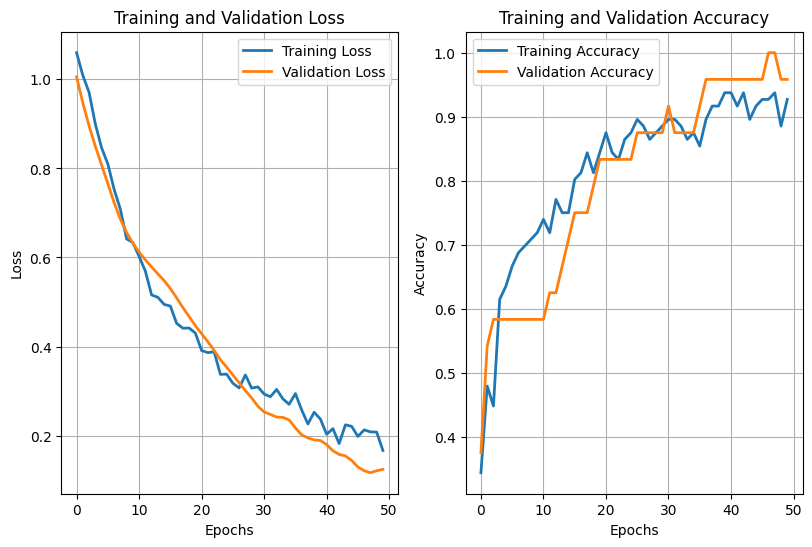

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
plt.plot(history.history['loss'], label='Training Loss',linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True,)

plt.subplot(1, 4, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy',linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

#Model Perfomance

In [ ]:
print(f"Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Total trainable parameters: {model.count_params():,}")

# Per-class accuracy
print(f"\nPer-class performance:")
for i, species in enumerate(iris.target_names):
    class_mask = (y_test == i)
    if sum(class_mask) > 0:
        class_acc = np.mean(y_pred[class_mask] == y_test[class_mask])
        print(f"{species}: {class_acc:.4f} ({class_acc*100:.1f}%)")

# Model complexity analysis
print(f"\nModel complexity:")
print(f"- Number of layers: {len(model.layers)}")
print(f"- Hidden layers: {len(model.layers) - 1}")
print(f"- Total parameters: {model.count_params()}")

# Training efficiency
print(f"\nTraining efficiency:")
print(f"- Epochs trained: {len(history.history['loss'])}")
print(f"- Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"- Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")


Final Test Accuracy: 0.9000 (90.00%)
Final Test Loss: 0.2024
Total trainable parameters: 2,979

Per-class performance:
setosa: 1.0000 (100.0%)
versicolor: 0.8000 (80.0%)
virginica: 0.9000 (90.0%)

Model complexity:
- Number of layers: 6
- Hidden layers: 5
- Total parameters: 2979

Training efficiency:
- Epochs trained: 50
- Final training accuracy: 0.9271
- Final validation accuracy: 0.9583


# Saving the Model

In [ ]:
model.save('my_model.keras')